<a href="https://colab.research.google.com/github/simranmallik/Math210/blob/Lab-56/Simran_Mallik_Lab_56.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5.6a

Goals:
 
* Produce visualizations of two-variable functions using a color map.
* Draw vectors on an axis.
* Use gradient ascent to find local maximums.
* Discover the relationship between starting points, parameters, and the output of gradient ascent.





Libraries!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

You'll be working with a function whose maximums and minimums are harder to solve for numerically.  Pick one of the functions below to work with.  You should pick a different function than your groupmates.

In [ ]:
# Ryan
def f1(x,y):
  return np.sin(x)+np.sin(2*x+y)
# Afshin
def f2(x,y):
  return np.cos(x)+np.sin(x-2*y)
# Abbey
def f3(x,y):
  return np.sin(x)+np.cos(3*x+y)
# Sim
def f4(x,y):
  return np.cos(y)+np.sin(x+3*y)

def f5(x,y):
  return np.cos(x)+np.sin(2*x+y)


# Questions
Write answers to these questions using code and text blocks.  When you are satisfied, download and submit an .ipynb file to Canvas.

## Q1

* Produce a nice colormapped diagram of your function on the domain $-6\leq x\leq 6$ and $-4\leq y\leq 4$.  Make sure you label your diagram, and correctly scale and orient your axes.

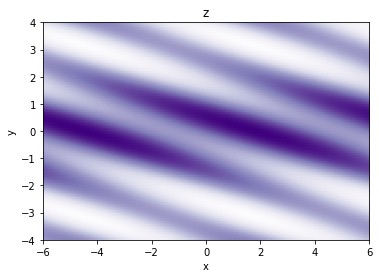

In [ ]:
xvalues=np.arange(-6,6,0.1)
yvalues=np.arange(-4,4,0.1)
x,y=np.meshgrid(xvalues,yvalues)

#f4(x,y)
z = f4(x,y)

ax=plt.axes(xlim=[-6,6], ylim=[-4,4])
ax.set_title('z')
ax.set_xlabel('x')
ax.set_ylabel('y')


ax.imshow(z, origin='lower', extent=(-6,6,-4,4), cmap='Purples')

## Q2

* Define a function `df(x,y)` that returns the gradient vector of your function at `(x,y)`.  
* Copy your `ascent()` function from the prelab.
* Pick a point not especially close to a local maximum as an initial guess. 
* Produce a visualization of a gradient ascent that approaches a local maximum.  You will need to experiment with `alpha` and `n` to get a nice ascent. 
* If your gradient ascent heads outside the graph, feel free to adjust the domain you show.


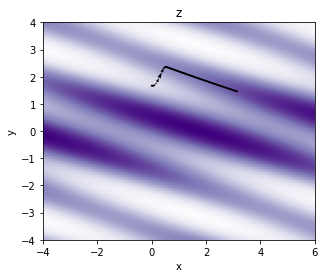

In [ ]:
def f4(x,y):
  return np.cos(y)+np.sin(x+3*y)

def df(x,y):
  return (np.cos(x+3*y), -1*np.sin(y) + 3*np.cos(x+3*y))

def ascent(x,y,dg,alpha,n):
  for i in range(n):
    ax.quiver(x,y,alpha*dg(x,y)[0],alpha*dg(x,y)[1],angles='xy',scale_units='xy', scale=1)
    x = x + alpha*dg(x,y)[0]
    y = y + alpha*dg(x,y)[1]
  return x,y


xvalues=np.arange(-4,6,0.1)
yvalues=np.arange(-4,4,0.1)
x,y=np.meshgrid(xvalues,yvalues)

z = f4(x,y)

ax=plt.axes(xlim=[-4,6], ylim=[-4,4])
ax.set_title('z')
ax.set_xlabel('x')
ax.set_ylabel('y')

# PICK RANDOM POINT AS NEAR LOCAL MAX

# ORIGINAL: 
ascent(0,1.67,df,.1,100)
ax.imshow(z, origin='lower', extent=(-4,6,-4,4), cmap='Purples')

## Q3

* What downsides are there to using too small an $\alpha$?  Explain in a couple sentences and illustrate with an example.
* What downsides are there to using too large an $\alpha$?  Explain in a couple sentences and illustrate with an example.


1. Using an 𝛼 that's too small will squeeze all the components of the gradient ascent together so it looks very small. The smaller alpha is, the more it will look like a straight line so that one cannot see multiple arrowheads in the graph. An example is illustrated below. 

2. Using an 𝛼 that's too large will produce an ascent 
- too many arrows pointing to diff maximums


## Q4 

* What determines which maximum a gradient ascent will approach (assuming a reasonable choice of $\alpha$)?  Can you give examples of two nearby points that approach two different maximums?



ANS: Assuming a reasonable choice of a, the function and the starting point determines which maximum a gradient approaches. Two nearby points that approach two different maximums are: (.1,.1) and (-1.6, 2.2). These are the approximate points. The code for this is below.

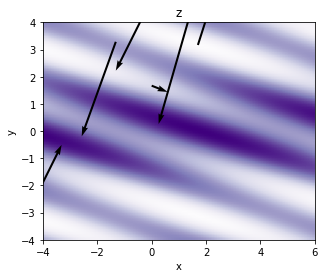

In [ ]:
ax=plt.axes(xlim=[-4,6], ylim=[-4,4])
ax.set_title('z')
ax.set_xlabel('x')
ax.set_ylabel('y')
ascent(0,1.67,df,2,100)
ax.imshow(z, origin='lower', extent=(-4,6,-4,4), cmap='Purples')

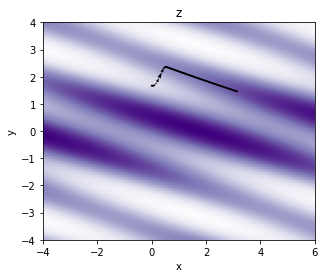

In [ ]:
ax=plt.axes(xlim=[-4,6], ylim=[-4,4])
ax.set_title('z')
ax.set_xlabel('x')
ax.set_ylabel('y')
ascent(0,1.67,df,.1,100)
ax.imshow(z, origin='lower', extent=(-4,6,-4,4), cmap='Purples')

## Q5

* How would you modify gradient ascent to find a local minimum instead?  
* Demonstrate.



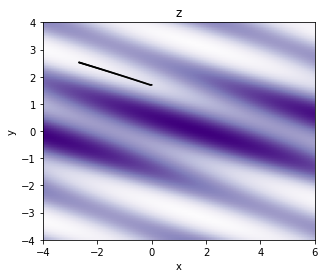

In [ ]:
def ascent_n(x,y,dg,alpha,n):
  for i in range(n):
    ax.quiver(x,y,alpha*dg(x,y)[0],alpha*dg(x,y)[1],angles='xy',scale_units='xy', scale=1)
    x = x - alpha*dg(x,y)[0]
    y = y - alpha*dg(x,y)[1]
  return x,y

ax=plt.axes(xlim=[-4,6], ylim=[-4,4])
ax.set_title('z')
ax.set_xlabel('x')
ax.set_ylabel('y')
ascent_n(0,1.7,df,.1,100)
ax.imshow(z, origin='lower', extent=(-4,6,-4,4), cmap='Purples')

## Optional (Programming)

Suppose we have only discreet values of our function.  Say it can only be evaluated at whole tenths of $x$ and $y$ (so (3.1,4) would work but (3.12,7) would not).  Can you reprogram gradient ascent to successfully approximate the necessary derivatives?

In [ ]:
def g(x,y)
  if 10*floor(x)==floor(10*x) and 10*floor(y)==floor(10*y):
    return 16-x**2-y**4
  else:
    print("I can't evaluate the function here")
    return None
